In [15]:
import numpy
from matplotlib import pyplot as plt

In [16]:
def gaussian_kernel(radius, radius_y=None):
    if not radius_y:
        radius_y = radius

    x, y = numpy.mgrid[-radius:radius + 1, -radius_y:radius_y + 1]
    g = numpy.exp(-(x ** 2 / float(radius) + y ** 2 / float(radius_y)))
    return g / g.sum()

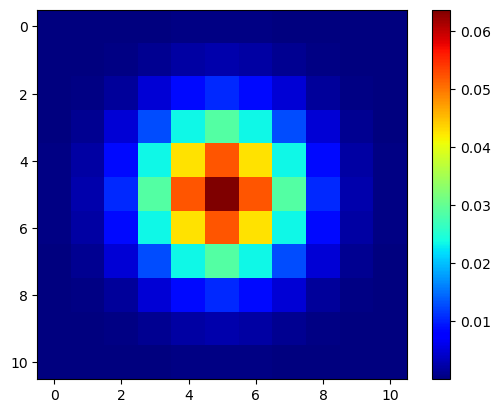

In [17]:
gaussian_kernel_array = gaussian_kernel(5)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

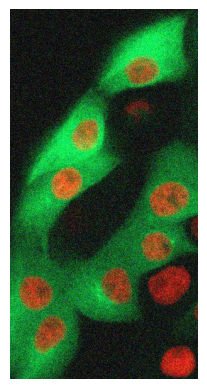

In [19]:
from skimage import io

img = io.imread("data/noisy_img.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

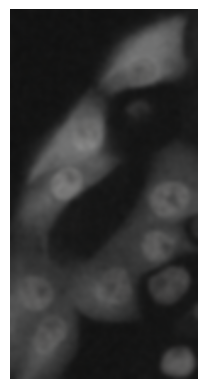

In [21]:
from scipy import ndimage as nd

gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imshow(gaussian_img)
plt.axis('off')
plt.show()

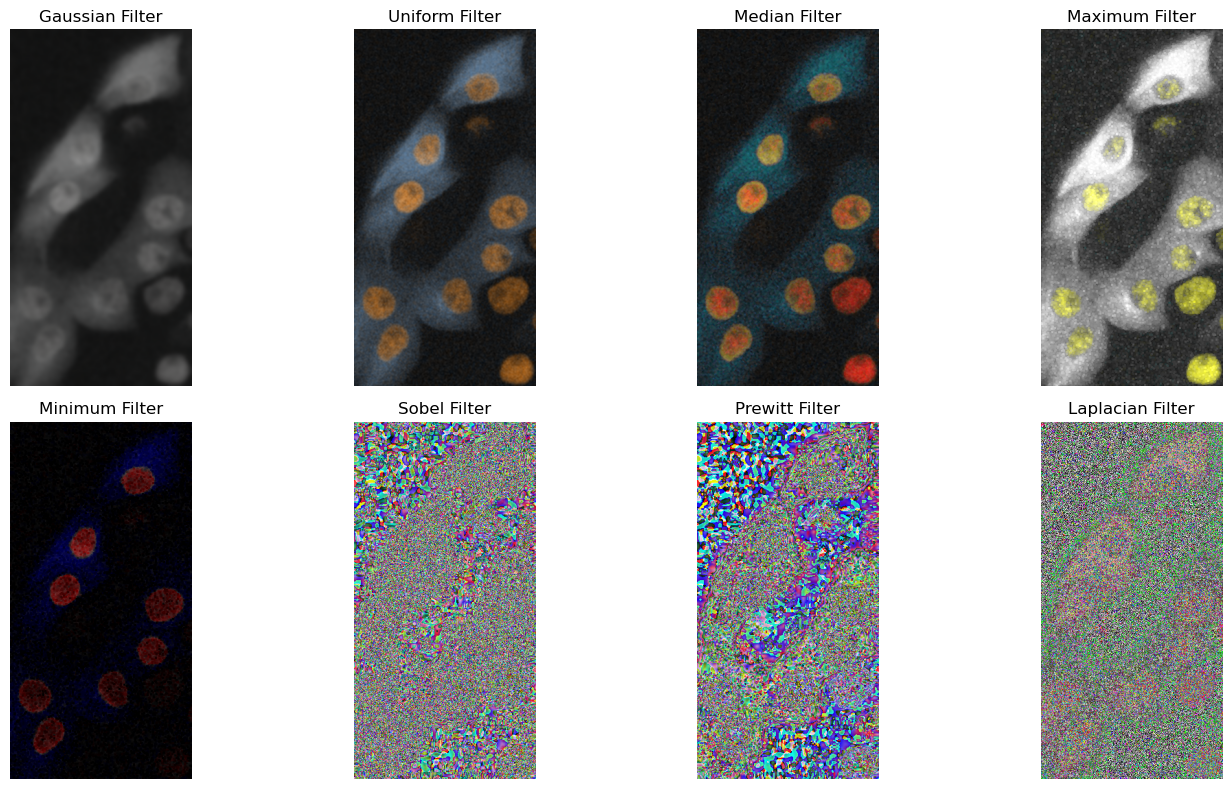

In [25]:
filters = {
    "Gaussian Filter": nd.gaussian_filter,
    "Uniform Filter": nd.uniform_filter,
    "Median Filter": nd.median_filter,
    "Maximum Filter": nd.maximum_filter,
    "Minimum Filter": nd.minimum_filter,
    "Sobel Filter": nd.sobel,
    "Prewitt Filter": nd.prewitt,
    "Laplacian Filter": nd.laplace
}

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for ax, (name, filter_func) in zip(axes, filters.items()):
    if name == "Gaussian Filter":
        filtered_img = filter_func(img, sigma=3)
    elif name in ["Uniform Filter", "Median Filter", "Maximum Filter", "Minimum Filter"]:
        filtered_img = filter_func(img, size=3)
    else:
        filtered_img = filter_func(img)

    ax.imshow(filtered_img, cmap='gray')
    ax.set_title(name)
    ax.axis('off')

plt.tight_layout()
plt.show()

The algorithm selects the median value of all the pixels in the selected window
NLM: https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html


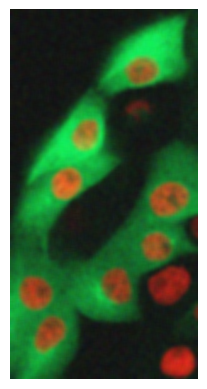

In [35]:
import pywt
from skimage.util import img_as_ubyte
from skimage.restoration import estimate_sigma, denoise_nl_means

sigma_est = numpy.mean(estimate_sigma(img, channel_axis=-1))

patch_kw = dict(patch_size=5, patch_distance=3, channel_axis=-1)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False, **patch_kw)

denoise_img_as_ubyte = img_as_ubyte(denoise_img)

plt.imshow(denoise_img)
plt.axis('off')
plt.show()